In [61]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl

def mid(npArr):
    return npArr.sum() / len(npArr)

#Расчет косвенной погрешности, если величина - произведение и частное данных
def sigma_mulls(val, sigsArr, parmsArr):
    sum = 0
    for i in range(len(sigsArr)):
        sum += (sigsArr[i] / parmsArr[i])**2
    return val * (sum)**0.5


#Расчет случайной погрешности среднего
def sigma_rand(valsArr):
    N = len(valsArr)
    valMid = sum(valsArr) / N
    msum = 0
    for val in valsArr:
        msum += (val - valMid)**2
        
    return (msum / (N * (N - 1))) ** 0.5


#MNK если y = kx
##DEPRECATED
def k_only(x, y):
    return mid(x * y) / mid(x * x)

##DEPRECATED
def k_only_sigma(x, y):
    return ((mid(x * x) * mid(y * y) - mid(x * y)**2) / (len(x) * mid(x * x)**2))**0.5

#MNK для y = kx + a
def k_coef(x, y):
    return (mid(x * y) - mid(x) * mid(y)) / (mid(x * x) - mid(x)**2)

def b_coef(x, y):
    return mid(y) - k_coef(x, y) * mid(x)

def k_sigma(x, y):
    return ((mid(y * y) - mid(y)**2) / (mid(x * x) - mid(x)**2) - k_coef(x, y)**2)**0.5  / len(x)**0.5






In [62]:
Fe = np.array ([[139835., 139093., 139020.],
                [83247., 82020., 82922.],
                [46805., 46927., 46525.],
                [27098., 27109., 27499.],
                [15679., 15557., 15744.]])
tmp = np.zeros (5)
FeSig = np.zeros (5)
for i in range (5):
    tmp[i] = mid (Fe[i])
    FeSig[i] = sigma_rand (Fe[i])
Fe = tmp


Al = np.array ([[163533., 162998., 161773.],
                [110952., 111181., 110676.],
                [74503., 74995., 74282.],
                [48968., 49111., 49625.],
                [33057., 32998., 33555.]])
tmp = np.zeros (5)
AlSig = np.zeros (5)
for i in range (5):
    tmp[i] = mid (Al[i])
    AlSig[i] = sigma_rand (Al[i])

Al = tmp

Pb = np.array ([[137743., 136171., 137868.],
                [82532., 83044., 82591.],
                [50134., 50740., 50559.],
                [33414., 33418., 33191.],
                [22010., 21721., 22012.]])
tmp = np.zeros (5)
PbSig = np.zeros (5)
for i in range (5):
    tmp[i] = mid (Pb[i])
    PbSig[i] = sigma_rand (Pb[i])
Pb = tmp

N0 = (261879 + 252786 + 248313) / 3

vals = np.array ([Fe, Al, Pb])

In [63]:
#пересчёт в логарифмический масштаб
FeLogSig = FeSig / Fe
FeLog = np.log (Fe)

PbLogSig = PbSig / Pb
PbLog = np.log (Pb)

AlLogSig = AlSig / Al
AlLog = np.log (Al)

valLogs = np.array ([FeLog, PbLog, AlLog])
valLogSigs = np.array ([FeLogSig, PbLogSig, AlLogSig])

 Поработаем с длинами

In [64]:
FeBlockLen = np.array ([10., 10., 10.2, 10., 10.])
AlBlockLen = np.array ([20., 20.2, 20.2, 20., 20.])
PbBlockLen = np.array ([5., 4.8, 4.5, 4.4, 4.5])

def summarize (npArr):
    sum = 0
    for i in range (np.size (npArr)):
        npArr[i] = sum + npArr[i]
        sum = npArr[i]

summarize (FeBlockLen)
summarize (AlBlockLen)
summarize (PbBlockLen)

print (FeBlockLen)
lens = np.array ([FeBlockLen, AlBlockLen, PbBlockLen])
lenSig = 0.1

lens /= 10  #cm
lenSig /= 10

[10.  20.  30.2 40.2 50.2]


mu Fe = -0.545 +- 0.003
mu Al = -0.228 +- 0.005
mu Pb = -0.881 +- 0.011


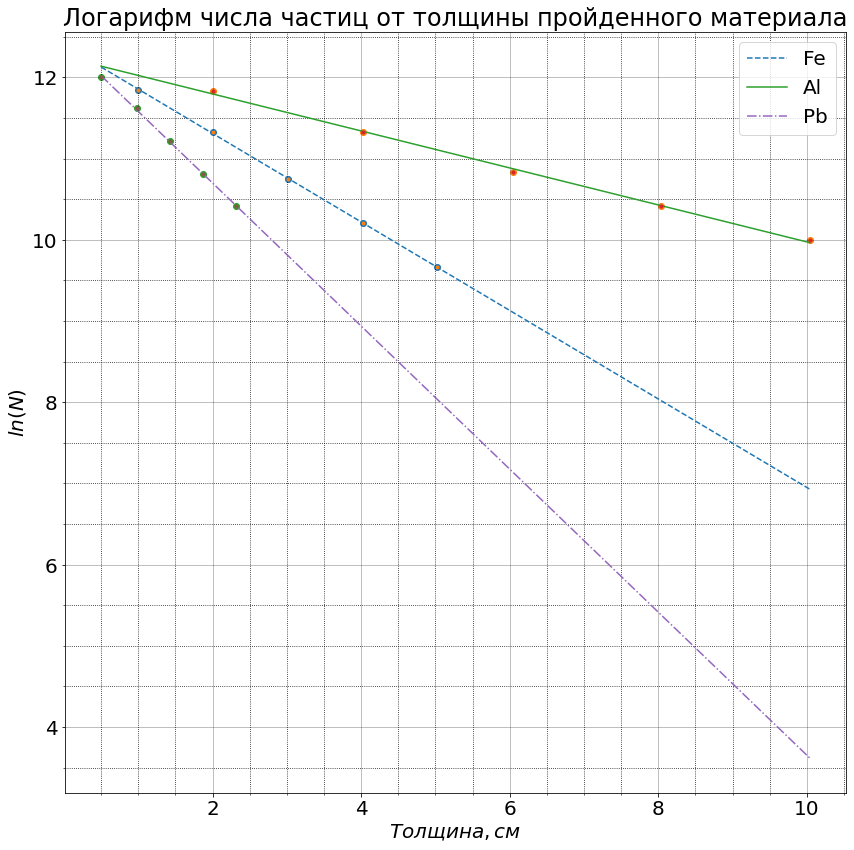

In [65]:
mpl.rcParams['font.size'] = 20
    

fig, ax = plt.subplots ()

ax.set_title ("Логарифм числа частиц от толщины пройденного материала")
ax.set_ylabel (r"$ln(N)$")
ax.set_xlabel (r"$Толщина, см$")

fig.set_figwidth (14)
fig.set_figheight (14)

ks = np.zeros (3)
kSigs = np.zeros (3)
labels = ["Fe", "Al", "Pb"]
mStyle = ['--', '-', '-.', ':'] 
for i in range (3):
    k = k_coef (lens[i], valLogs[i])
    b = b_coef (lens[i], valLogs[i])
    kSig = k_sigma (lens[i], valLogs[i])
    
    xTwoPoint = np.linspace (np.min (lens), np.max (lens), 2)
    yTwoPoint = k * xTwoPoint + b 

    ax.scatter (lens[i], valLogs[i])
    ax.plot (xTwoPoint, yTwoPoint, label=labels[i], linestyle=mStyle[i])

    ax.errorbar (lens[i], valLogs[i], yerr=valLogSigs[i], xerr=lenSig, fmt='.') 

    print (r"mu %s = %.3f +- %.3f"%(labels[i], k, kSig))
    ks[i] = k
    kSigs[i] = kSig

    





ax.minorticks_on()

ax.grid(which='major',
        color = 'k', 
        linewidth = 0.5,
       alpha = 0.5)

ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

plt.legend()
plt.savefig('lab551_first.png')
plt.show()


# Пересчитаем в $\mu_1$

In [66]:
density = np.array ([7.87, 2.7, 11.35])
mu1 = ks / density
mu1Sig = kSigs / density
print (mu1) 
print (mu1Sig)

[-0.0692465  -0.08436951 -0.07760248]
[0.00032329 0.00172828 0.00097506]


#  Средняя энергия гамма лучей

In [70]:
E = np.array ([0.8, 0.5, 0.9])
print (f"average E = {mid(E)} +- {sigma_rand (E)}")

average E = 0.7333333333333334 +- 0.12018504251546633
